In [278]:
import pandas as pd
from river.ensemble import AdaBoostClassifier, AdaptiveRandomForestClassifier
from river.tree import HoeffdingTreeClassifier
from sklearn.model_selection import train_test_split
from river import metrics
import matplotlib.pyplot as plt
import pickle

In [239]:
data1 = pd.read_csv("demofile2.csv", sep=",")
data2 = pd.read_csv("demofile2.csv", sep=",")
# data3 = pd.read_csv("test2.csv", sep=",")
# data = pd.read_csv("demodata.csv", sep=",")

In [240]:
data1

,Humidity1,Temperature1,Humidity2,Temperature2,LDR1,LDR2,PIR_value
0,40.4,30.8,41.1,30.5,3198.70,3026.66,0
1,40.4,30.8,41.1,30.5,3259.51,3026.66,0
2,40.4,30.8,41.0,30.5,3259.51,3026.66,1
3,40.4,30.8,41.1,30.5,3198.70,3026.66,1
4,40.4,30.8,41.1,30.5,3259.51,3026.66,1
...,...,...,...,...,...,...,...
8203,41.4,31.0,41.7,30.9,0.18,2770.68,0
8204,41.2,31.0,41.3,30.9,0.20,2819.07,0
8205,41.1,31.0,40.9,30.9,0.18,2770.68,0
8206,41.0,31.0,40.6,30.9,0.18,2819.07,0


In [241]:
data2

,Humidity1,Temperature1,Humidity2,Temperature2,LDR1,LDR2,PIR_value
0,40.4,30.8,41.1,30.5,3198.70,3026.66,0
1,40.4,30.8,41.1,30.5,3259.51,3026.66,0
2,40.4,30.8,41.0,30.5,3259.51,3026.66,1
3,40.4,30.8,41.1,30.5,3198.70,3026.66,1
4,40.4,30.8,41.1,30.5,3259.51,3026.66,1
...,...,...,...,...,...,...,...
8203,41.4,31.0,41.7,30.9,0.18,2770.68,0
8204,41.2,31.0,41.3,30.9,0.20,2819.07,0
8205,41.1,31.0,40.9,30.9,0.18,2770.68,0
8206,41.0,31.0,40.6,30.9,0.18,2819.07,0


In [242]:
# data3.head()

In [243]:
Xm1 = data1.drop(columns=["LDR1"], axis=1)
ym1 = data1["LDR1"]
X_train, X_test, y_train, y_test  = train_test_split(Xm1, ym1, random_state=40)

In [244]:
Xm2 = data2.drop(columns=["Temperature1"], axis=1)
ym2 = data2["Temperature1"]
X_train2, X_test2, y_train2, y_test2  = train_test_split(Xm2, ym2, random_state=40)

In [245]:
X_train = X_train.to_dict("index")
X_test = X_test.to_dict("index")

X_train2 = X_train2.to_dict("index")
X_test2 = X_test2.to_dict("index")

# X_train2 = X_train2.to_dict("index")
# X_test2 = X_test2.to_dict("index")

In [246]:
X_train2

{3073: {'Humidity1': 41.4,
  'Humidity2': 41.7,
  'Temperature2': 30.9,
  'LDR1': 0.18,
  'LDR2': 2770.68,
  'PIR_value': 0},
 2672: {'Humidity1': 43.5,
  'Humidity2': 40.5,
  'Temperature2': 30.8,
  'LDR1': 3198.7,
  'LDR2': 2819.07,
  'PIR_value': 0},
 4427: {'Humidity1': 40.2,
  'Humidity2': 42.8,
  'Temperature2': 30.9,
  'LDR1': 0.16,
  'LDR2': 0.14,
  'PIR_value': 0},
 6386: {'Humidity1': 43.2,
  'Humidity2': 39.9,
  'Temperature2': 30.9,
  'LDR1': 0.18,
  'LDR2': 2868.81,
  'PIR_value': 1},
 6: {'Humidity1': 40.6,
  'Humidity2': 41.1,
  'Temperature2': 30.5,
  'LDR1': 3198.7,
  'LDR2': 2972.55,
  'PIR_value': 1},
 5600: {'Humidity1': 41.0,
  'Humidity2': 42.3,
  'Temperature2': 30.8,
  'LDR1': 3259.51,
  'LDR2': 0.18,
  'PIR_value': 1},
 2749: {'Humidity1': 40.4,
  'Humidity2': 40.4,
  'Temperature2': 30.5,
  'LDR1': 3259.51,
  'LDR2': 2819.07,
  'PIR_value': 0},
 3442: {'Humidity1': 40.4,
  'Humidity2': 40.2,
  'Temperature2': 30.5,
  'LDR1': 3259.51,
  'LDR2': 2819.07,
  'PIR_

In [247]:
# For Light
model1 = AdaptiveRandomForestClassifier()
model2 = AdaBoostClassifier(model=HoeffdingTreeClassifier(), n_models=10, seed=40)   
model4 = AdaBoostClassifier(model=AdaptiveRandomForestClassifier(), n_models=10, seed=40)
model3 = HoeffdingTreeClassifier()       

In [248]:
# For Temp
model1T = AdaptiveRandomForestClassifier()
model2T = AdaBoostClassifier(model=HoeffdingTreeClassifier(), n_models=10, seed=40)   
model4T = AdaBoostClassifier(model=AdaptiveRandomForestClassifier(), n_models=10, seed=40)
model3T = HoeffdingTreeClassifier()       

In [249]:
# training model
metric1 = metrics.Accuracy()

for i in X_train:
    model1 = model1.learn_one(X_train[i], y_train[i])
    y_pred1 = model1.predict_one(X_train[i])
    metric1 = metric1.update(y_train[i], y_pred1)
    # print(X_train[i], j) 
    print(metric1)

Accuracy: 100.00%
Accuracy: 50.00%
Accuracy: 33.33%
Accuracy: 50.00%
Accuracy: 60.00%
Accuracy: 50.00%
Accuracy: 42.86%
Accuracy: 50.00%
Accuracy: 55.56%
Accuracy: 60.00%
Accuracy: 63.64%
Accuracy: 66.67%
Accuracy: 69.23%
Accuracy: 64.29%
Accuracy: 60.00%
Accuracy: 56.25%
Accuracy: 58.82%
Accuracy: 55.56%
Accuracy: 57.89%
Accuracy: 60.00%
Accuracy: 61.90%
Accuracy: 63.64%
Accuracy: 65.22%
Accuracy: 66.67%
Accuracy: 64.00%
Accuracy: 65.38%
Accuracy: 66.67%
Accuracy: 67.86%
Accuracy: 68.97%
Accuracy: 70.00%
Accuracy: 70.97%
Accuracy: 71.88%
Accuracy: 72.73%
Accuracy: 73.53%
Accuracy: 74.29%
Accuracy: 72.22%
Accuracy: 70.27%
Accuracy: 68.42%
Accuracy: 69.23%
Accuracy: 70.00%
Accuracy: 68.29%
Accuracy: 66.67%
Accuracy: 67.44%
Accuracy: 65.91%
Accuracy: 66.67%
Accuracy: 65.22%
Accuracy: 65.96%
Accuracy: 66.67%
Accuracy: 65.31%
Accuracy: 66.00%
Accuracy: 64.71%
Accuracy: 63.46%
Accuracy: 64.15%
Accuracy: 64.81%
Accuracy: 63.64%
Accuracy: 64.29%
Accuracy: 63.16%
Accuracy: 62.07%
Accuracy: 62.

In [250]:
# training model Temp
metric1T = metrics.Accuracy()

for i in X_train2:
    model1T = model1T.learn_one(X_train2[i], y_train2[i])
    y_pred1T = model1T.predict_one(X_train2[i])
    metric1T = metric1T.update(y_train2[i], y_pred1T)
    # print(X_train2[i], j) 
    print(metric1T)

Accuracy: 100.00%
Accuracy: 100.00%
Accuracy: 100.00%
Accuracy: 75.00%
Accuracy: 60.00%
Accuracy: 50.00%
Accuracy: 42.86%
Accuracy: 37.50%
Accuracy: 44.44%
Accuracy: 40.00%
Accuracy: 36.36%
Accuracy: 41.67%
Accuracy: 38.46%
Accuracy: 35.71%
Accuracy: 40.00%
Accuracy: 37.50%
Accuracy: 41.18%
Accuracy: 38.89%
Accuracy: 42.11%
Accuracy: 45.00%
Accuracy: 47.62%
Accuracy: 50.00%
Accuracy: 47.83%
Accuracy: 50.00%
Accuracy: 52.00%
Accuracy: 53.85%
Accuracy: 55.56%
Accuracy: 57.14%
Accuracy: 58.62%
Accuracy: 60.00%
Accuracy: 61.29%
Accuracy: 62.50%
Accuracy: 63.64%
Accuracy: 64.71%
Accuracy: 65.71%
Accuracy: 66.67%
Accuracy: 67.57%
Accuracy: 65.79%
Accuracy: 66.67%
Accuracy: 67.50%
Accuracy: 65.85%
Accuracy: 66.67%
Accuracy: 67.44%
Accuracy: 68.18%
Accuracy: 68.89%
Accuracy: 69.57%
Accuracy: 70.21%
Accuracy: 70.83%
Accuracy: 69.39%
Accuracy: 70.00%
Accuracy: 70.59%
Accuracy: 71.15%
Accuracy: 71.70%
Accuracy: 72.22%
Accuracy: 70.91%
Accuracy: 69.64%
Accuracy: 70.18%
Accuracy: 68.97%
Accuracy: 6

In [251]:
# training model
metric2 = metrics.Accuracy()

for i in X_train:
    model2 = model2.learn_one(X_train[i], y_train[i])
    y_pred2 = model2.predict_one(X_train[i])
    metric2 = metric2.update(y_train[i], y_pred2)
    # print(X_train[i], j) 
    print(metric2)

Accuracy: 100.00%
Accuracy: 100.00%
Accuracy: 66.67%
Accuracy: 75.00%
Accuracy: 80.00%
Accuracy: 66.67%
Accuracy: 57.14%
Accuracy: 50.00%
Accuracy: 55.56%
Accuracy: 60.00%
Accuracy: 54.55%
Accuracy: 50.00%
Accuracy: 46.15%
Accuracy: 50.00%
Accuracy: 46.67%
Accuracy: 43.75%
Accuracy: 41.18%
Accuracy: 38.89%
Accuracy: 42.11%
Accuracy: 45.00%
Accuracy: 42.86%
Accuracy: 45.45%
Accuracy: 43.48%
Accuracy: 41.67%
Accuracy: 40.00%
Accuracy: 42.31%
Accuracy: 44.44%
Accuracy: 42.86%
Accuracy: 41.38%
Accuracy: 43.33%
Accuracy: 45.16%
Accuracy: 46.88%
Accuracy: 48.48%
Accuracy: 50.00%
Accuracy: 51.43%
Accuracy: 52.78%
Accuracy: 51.35%
Accuracy: 52.63%
Accuracy: 51.28%
Accuracy: 52.50%
Accuracy: 51.22%
Accuracy: 50.00%
Accuracy: 48.84%
Accuracy: 47.73%
Accuracy: 46.67%
Accuracy: 45.65%
Accuracy: 44.68%
Accuracy: 45.83%
Accuracy: 46.94%
Accuracy: 48.00%
Accuracy: 47.06%
Accuracy: 46.15%
Accuracy: 47.17%
Accuracy: 48.15%
Accuracy: 47.27%
Accuracy: 48.21%
Accuracy: 47.37%
Accuracy: 46.55%
Accuracy: 45

In [252]:
# training model Temp
metric2T = metrics.Accuracy()

for i in X_train2:
    model2T = model2T.learn_one(X_train2[i], y_train2[i])
    y_pred2T = model2T.predict_one(X_train2[i])
    metric2T = metric2T.update(y_train2[i], y_pred2T)
    # print(X_train2[i], j) 
    print(metric2T)

Accuracy: 100.00%
Accuracy: 100.00%
Accuracy: 100.00%
Accuracy: 100.00%
Accuracy: 80.00%
Accuracy: 66.67%
Accuracy: 71.43%
Accuracy: 75.00%
Accuracy: 66.67%
Accuracy: 60.00%
Accuracy: 54.55%
Accuracy: 50.00%
Accuracy: 53.85%
Accuracy: 50.00%
Accuracy: 53.33%
Accuracy: 50.00%
Accuracy: 47.06%
Accuracy: 44.44%
Accuracy: 47.37%
Accuracy: 50.00%
Accuracy: 47.62%
Accuracy: 50.00%
Accuracy: 52.17%
Accuracy: 50.00%
Accuracy: 52.00%
Accuracy: 50.00%
Accuracy: 51.85%
Accuracy: 50.00%
Accuracy: 48.28%
Accuracy: 46.67%
Accuracy: 45.16%
Accuracy: 46.88%
Accuracy: 45.45%
Accuracy: 44.12%
Accuracy: 45.71%
Accuracy: 47.22%
Accuracy: 45.95%
Accuracy: 44.74%
Accuracy: 46.15%
Accuracy: 47.50%
Accuracy: 46.34%
Accuracy: 45.24%
Accuracy: 46.51%
Accuracy: 45.45%
Accuracy: 44.44%
Accuracy: 43.48%
Accuracy: 42.55%
Accuracy: 41.67%
Accuracy: 40.82%
Accuracy: 42.00%
Accuracy: 43.14%
Accuracy: 42.31%
Accuracy: 41.51%
Accuracy: 42.59%
Accuracy: 41.82%
Accuracy: 41.07%
Accuracy: 40.35%
Accuracy: 39.66%
Accuracy: 

In [253]:
# training model
metric3 = metrics.Accuracy()

for i in X_train:
    model3 = model3.learn_one(X_train[i], y_train[i])
    y_pred3 = model3.predict_one(X_train[i])
    metric3 = metric3.update(y_train[i], y_pred3)
    # print(X_train[i], j) 
    print(metric3)

Accuracy: 100.00%
Accuracy: 50.00%
Accuracy: 66.67%
Accuracy: 75.00%
Accuracy: 60.00%
Accuracy: 50.00%
Accuracy: 42.86%
Accuracy: 37.50%
Accuracy: 33.33%
Accuracy: 40.00%
Accuracy: 36.36%
Accuracy: 33.33%
Accuracy: 38.46%
Accuracy: 42.86%
Accuracy: 40.00%
Accuracy: 37.50%
Accuracy: 35.29%
Accuracy: 33.33%
Accuracy: 36.84%
Accuracy: 40.00%
Accuracy: 38.10%
Accuracy: 40.91%
Accuracy: 39.13%
Accuracy: 37.50%
Accuracy: 36.00%
Accuracy: 34.62%
Accuracy: 37.04%
Accuracy: 39.29%
Accuracy: 41.38%
Accuracy: 40.00%
Accuracy: 38.71%
Accuracy: 40.62%
Accuracy: 39.39%
Accuracy: 41.18%
Accuracy: 42.86%
Accuracy: 41.67%
Accuracy: 40.54%
Accuracy: 39.47%
Accuracy: 41.03%
Accuracy: 42.50%
Accuracy: 41.46%
Accuracy: 40.48%
Accuracy: 41.86%
Accuracy: 40.91%
Accuracy: 40.00%
Accuracy: 39.13%
Accuracy: 40.43%
Accuracy: 41.67%
Accuracy: 40.82%
Accuracy: 40.00%
Accuracy: 39.22%
Accuracy: 38.46%
Accuracy: 37.74%
Accuracy: 38.89%
Accuracy: 38.18%
Accuracy: 37.50%
Accuracy: 36.84%
Accuracy: 36.21%
Accuracy: 37.

In [254]:
# training model Temp
metric3T = metrics.Accuracy()

for i in X_train2:
    model3T = model3T.learn_one(X_train2[i], y_train2[i])
    y_pred3T = model3T.predict_one(X_train2[i])
    metric3T = metric3T.update(y_train2[i], y_pred3T)
    # print(X_train2[i], j) 
    print(metric3T)

Accuracy: 100.00%
Accuracy: 100.00%
Accuracy: 100.00%
Accuracy: 75.00%
Accuracy: 60.00%
Accuracy: 50.00%
Accuracy: 42.86%
Accuracy: 37.50%
Accuracy: 44.44%
Accuracy: 40.00%
Accuracy: 36.36%
Accuracy: 33.33%
Accuracy: 30.77%
Accuracy: 28.57%
Accuracy: 26.67%
Accuracy: 25.00%
Accuracy: 23.53%
Accuracy: 22.22%
Accuracy: 21.05%
Accuracy: 25.00%
Accuracy: 23.81%
Accuracy: 22.73%
Accuracy: 21.74%
Accuracy: 20.83%
Accuracy: 20.00%
Accuracy: 19.23%
Accuracy: 22.22%
Accuracy: 21.43%
Accuracy: 20.69%
Accuracy: 20.00%
Accuracy: 22.58%
Accuracy: 21.88%
Accuracy: 21.21%
Accuracy: 23.53%
Accuracy: 22.86%
Accuracy: 25.00%
Accuracy: 27.03%
Accuracy: 26.32%
Accuracy: 28.21%
Accuracy: 30.00%
Accuracy: 29.27%
Accuracy: 28.57%
Accuracy: 30.23%
Accuracy: 29.55%
Accuracy: 28.89%
Accuracy: 28.26%
Accuracy: 29.79%
Accuracy: 31.25%
Accuracy: 30.61%
Accuracy: 30.00%
Accuracy: 31.37%
Accuracy: 32.69%
Accuracy: 32.08%
Accuracy: 33.33%
Accuracy: 32.73%
Accuracy: 32.14%
Accuracy: 33.33%
Accuracy: 34.48%
Accuracy: 3

In [255]:
# training model
metric4 = metrics.Accuracy()

for i in X_train:
    model4 = model4.learn_one(X_train[i], y_train[i])
    y_pred4 = model4.predict_one(X_train[i])
    metric4 = metric4.update(y_train[i], y_pred4)
    # print(X_train[i], j) 
    print(metric4)

Accuracy: 100.00%
Accuracy: 100.00%
Accuracy: 100.00%
Accuracy: 100.00%
Accuracy: 100.00%
Accuracy: 83.33%
Accuracy: 71.43%
Accuracy: 75.00%
Accuracy: 77.78%
Accuracy: 80.00%
Accuracy: 72.73%
Accuracy: 66.67%
Accuracy: 61.54%
Accuracy: 57.14%
Accuracy: 53.33%
Accuracy: 50.00%
Accuracy: 47.06%
Accuracy: 44.44%
Accuracy: 42.11%
Accuracy: 45.00%
Accuracy: 42.86%
Accuracy: 45.45%
Accuracy: 43.48%
Accuracy: 41.67%
Accuracy: 40.00%
Accuracy: 42.31%
Accuracy: 44.44%
Accuracy: 46.43%
Accuracy: 48.28%
Accuracy: 50.00%
Accuracy: 48.39%
Accuracy: 50.00%
Accuracy: 51.52%
Accuracy: 52.94%
Accuracy: 54.29%
Accuracy: 52.78%
Accuracy: 54.05%
Accuracy: 52.63%
Accuracy: 53.85%
Accuracy: 55.00%
Accuracy: 53.66%
Accuracy: 52.38%
Accuracy: 53.49%
Accuracy: 52.27%
Accuracy: 51.11%
Accuracy: 50.00%
Accuracy: 51.06%
Accuracy: 52.08%
Accuracy: 51.02%
Accuracy: 52.00%
Accuracy: 50.98%
Accuracy: 50.00%
Accuracy: 50.94%
Accuracy: 51.85%
Accuracy: 50.91%
Accuracy: 50.00%
Accuracy: 49.12%
Accuracy: 48.28%
Accuracy:

In [256]:
# training model Temp
metric4T = metrics.Accuracy()

for i in X_train2:
    model4T = model4T.learn_one(X_train2[i], y_train2[i])
    y_pred4T = model4T.predict_one(X_train2[i])
    metric4T = metric4T.update(y_train2[i], y_pred4T)
    # print(X_train[i], j) 
    print(metric4T)

Accuracy: 100.00%
Accuracy: 100.00%
Accuracy: 100.00%
Accuracy: 100.00%
Accuracy: 80.00%
Accuracy: 66.67%
Accuracy: 71.43%
Accuracy: 75.00%
Accuracy: 66.67%
Accuracy: 60.00%
Accuracy: 63.64%
Accuracy: 58.33%
Accuracy: 61.54%
Accuracy: 64.29%
Accuracy: 66.67%
Accuracy: 62.50%
Accuracy: 58.82%
Accuracy: 55.56%
Accuracy: 57.89%
Accuracy: 60.00%
Accuracy: 57.14%
Accuracy: 54.55%
Accuracy: 52.17%
Accuracy: 50.00%
Accuracy: 52.00%
Accuracy: 50.00%
Accuracy: 51.85%
Accuracy: 53.57%
Accuracy: 55.17%
Accuracy: 53.33%
Accuracy: 54.84%
Accuracy: 56.25%
Accuracy: 57.58%
Accuracy: 58.82%
Accuracy: 60.00%
Accuracy: 58.33%
Accuracy: 59.46%
Accuracy: 57.89%
Accuracy: 58.97%
Accuracy: 60.00%
Accuracy: 58.54%
Accuracy: 57.14%
Accuracy: 58.14%
Accuracy: 56.82%
Accuracy: 57.78%
Accuracy: 58.70%
Accuracy: 59.57%
Accuracy: 60.42%
Accuracy: 59.18%
Accuracy: 60.00%
Accuracy: 60.78%
Accuracy: 61.54%
Accuracy: 60.38%
Accuracy: 61.11%
Accuracy: 60.00%
Accuracy: 58.93%
Accuracy: 59.65%
Accuracy: 58.62%
Accuracy: 

In [262]:
# '40.30', '30.90', '44.60', '30.90', '0.14', '0.12', '0'
model4.predict_one({
    'Humidity1': 40.3,
    'Temperature1': 30.90,
    'Humidity2': 44.60,
    'Temperature2': 30.90,
    'LDR2': 0.12,
    'PIR_value': 0,
  })

0.14

In [266]:
# '40.30', '30.90', '44.60', '30.90', '0.14', '0.12', '0'
z = model4T.predict_one({
    'Humidity1': 40.3,
    'Humidity2': 44.60,
    'Temperature2': 30.90,
    'LDR1': 0.14,
    'LDR2': 0.12,
    'PIR_value': 0,
  })
print(z)

30.9


In [267]:
#saving model for light
# filename = 'trained_ADA_AFC_light.pkl'
# pickle.dump(model4, open(filename, 'wb'))

In [268]:
#saving model for Temp
# filename = 'trained_ADA_AFC_temp.pkl'
# pickle.dump(model4T, open(filename, 'wb'))

Text(0, 0.5, 'Performance')

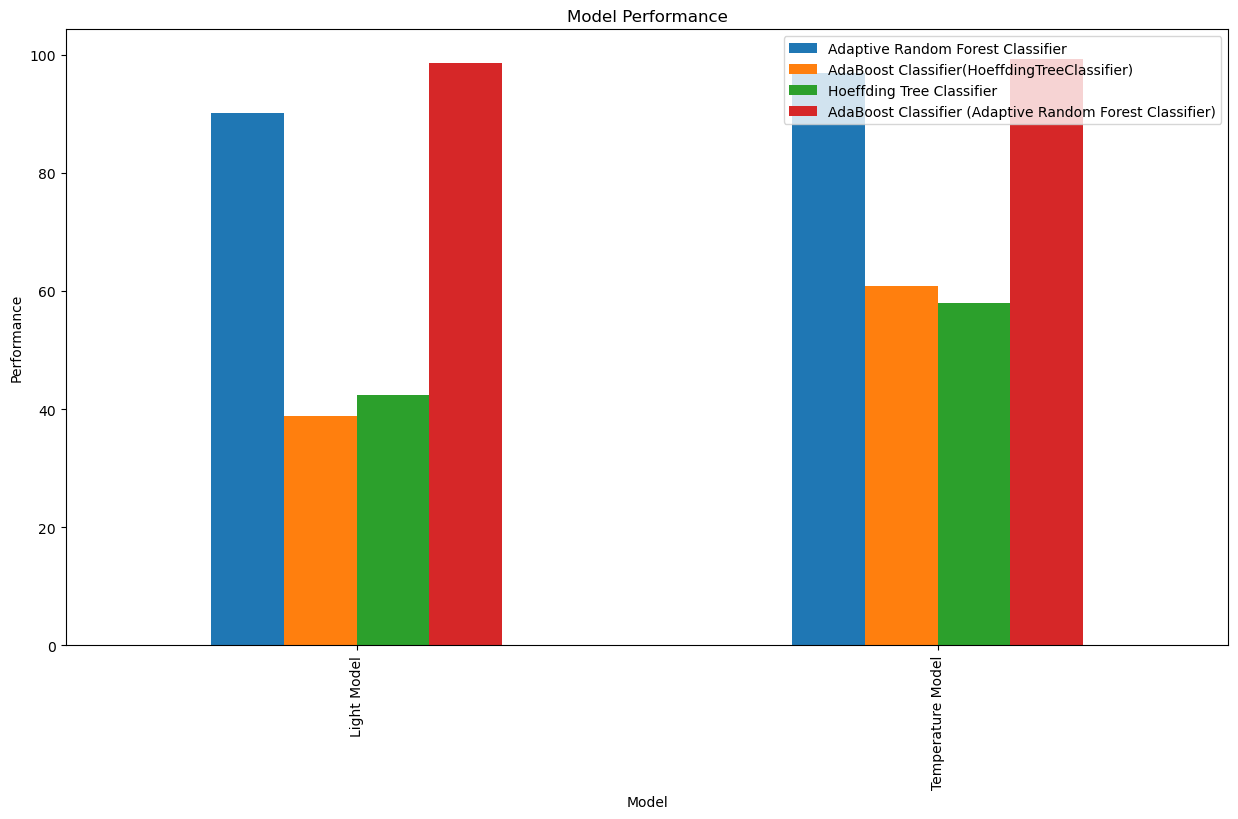

In [279]:
plotdata = pd.DataFrame({

    "Adaptive Random Forest Classifier":[float(str(metric1).split(" ")[1][:-1]), float(str(metric1T).split(" ")[1][:-1])],

    "AdaBoost Classifier(HoeffdingTreeClassifier)":[float(str(metric2).split(" ")[1][:-1]), float(str(metric2T).split(" ")[1][:-1])],

    "Hoeffding Tree Classifier":[float(str(metric3).split(" ")[1][:-1]), float(str(metric3T).split(" ")[1][:-1])],

    "AdaBoost Classifier (Adaptive Random Forest Classifier)":[float(str(metric4).split(" ")[1][:-1]), float(str(metric4T).split(" ")[1][:-1])]
    },

    index=["Light Model", "Temperature Model"])

plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("Model Performance")

plt.xlabel("Model")

plt.ylabel("Performance")